# Superparamagnetic Network - Machine Learning Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import random as rnd

import SP_anisotropy_class as SPN

#3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## The SP Network

$e = \frac{E}{KV}$, $H_K = \frac{2K}{\mu_0M_S}$, $h=\frac{H}{H_K}$, $k_\sigma=\frac{K_\sigma}{K}$, $\omega'=\frac{\omega}{f_0}$ and $\beta'=\frac{KV}{k_BT}$

$h=0.4$

$\theta_H=90°$

$\phi=45°$

$\beta'=10$

The system is at equilibrium with $k_\sigma=0$ and we instantly set $k_\sigma=1$.

$f_0=10^{10}Hz$

We call the characteristic memory time scale $T$.

In [2]:
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)

f0 = 1e10

In [3]:
spn.k_s = 1
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0) #Characteristic memory time
t_step = T/100 #We take a t_step 100 times smaller than T
time = np.arange(0,5*T,t_step) #We want to see 5 T
m_t = [spn.get_m()]

for i in range(len(time)-1):
    spn.evolve(f0,t_step)
    m_t.append(spn.get_m())

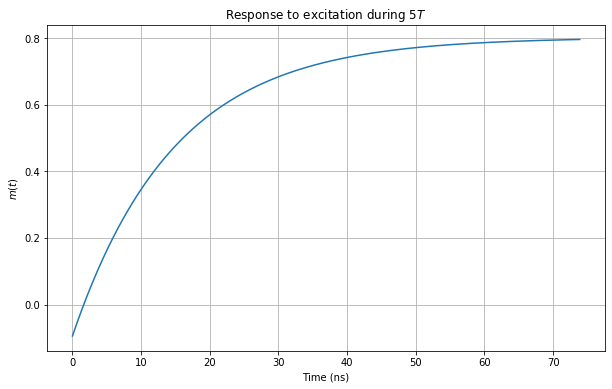

In [4]:
plt.figure(figsize=(10,6))
plt.plot(time*1e9,m_t)
plt.grid(True)
plt.title("Response to excitation during 5"+r'$T$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()

Now let's use a random signal as input.

In [5]:
def rnd_signal(n):
    signal = []
    for i in range(n):
        signal.append(2*rnd.random()-1)
    return(signal)

In [9]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
theta = T #Duration of each input
t_step = theta/N #We take a t_step 100 times smaller than theta
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*theta
time = np.linspace(0,n*theta,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

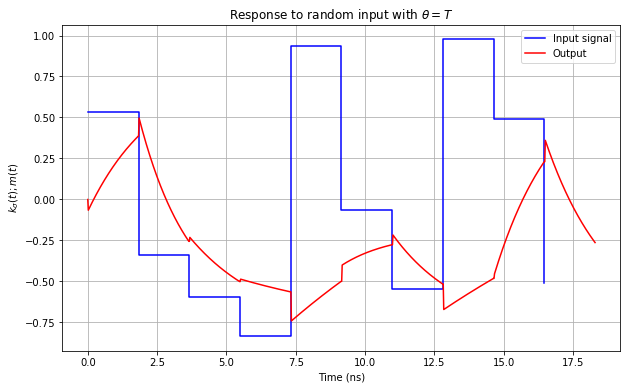

In [10]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\theta=T$')
plt.ylabel(r'$k_\sigma(t) ; m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

In [11]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
theta = T/10 #Duration of each input
t_step = theta/N #We take a t_step 100 times smaller than theta
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*theta
time = np.linspace(0,n*theta,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

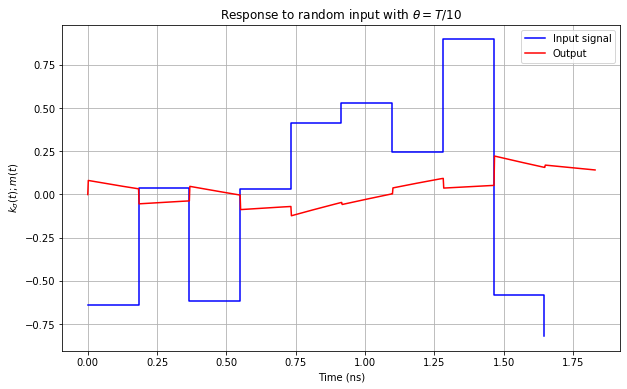

In [12]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\theta=T/10$')
plt.ylabel(r'$k_\sigma(t) ; m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

In [13]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
theta = T*10 #Duration of each input
t_step = theta/N #We take a t_step 100 times smaller than tau_signal
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*theta
time = np.linspace(0,n*theta,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

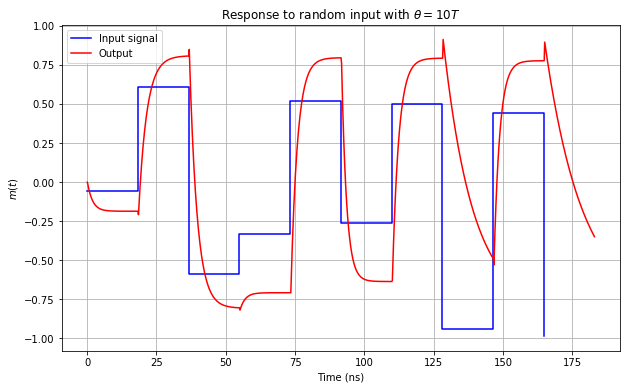

In [14]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\theta=10T$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

## Towards Machine Learning

In [2]:
#Ignore the first 50 elements of the output
spacer = 50

In [3]:
def Ridge_regression(S, Y, alpha):
    '''
    For a linear layer we can solve the weights by a direct method
    If the error function is the mean square error given by
        E = |Y - S * W |^2 + \alpha |W|^2
    where the L2 norm is being applied and the variables are
        Y = [Nsamples x Noutputs] is the desired output
        S = [Nsamples x Nweights] is the input signal
        W = [Nweights x Noutputs] is the weight matrix
    To minimise E we need to solve:
        S^T * Y = (S^T * S  + \alpha I) * W
        W = (S^T*S + \alpha I)^-1 * S^T * Y
    '''
    STS = np.matmul(S.T, S)
    STY = np.matmul(S.T, Y)
    Sdag = np.linalg.pinv(STS + alpha*np.eye(len(STS)))
    return(np.matmul(Sdag, STY))

In [4]:
def NARMA10(Ns):
    # Ns is the number of samples
    u = np.random.random(Ns+50+spacer)*0.5
    y = np.zeros(Ns+50+spacer)
    for k in range(10,Ns+50+spacer):
        y[k] = 0.3*y[k-1] + 0.05*y[k-1]*np.sum(y[k-10:k]) + 1.5*u[k-1]*u[k-10] + 0.1
    return(u[50:],y[50+spacer:])

In [5]:
def mask_NARMA10(m0,Nvirt):
    # Nvirt is the number of virtual nodes
    mask = []
    for i in range(Nvirt):
        mask.append(rnd.choice([-1,1])*m0)
    mask = mask
    return(mask)

In [6]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

In [8]:
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
f0 = 1e10
class Single_Node_Reservoir_NARMA10:
    
    def __init__(self, Nvirt, T_theta_ratio, m0, gamma, beta_prime = 10, bias = True):
        self.Nin = 1
        self.Nvirt = Nvirt
        self.Nout = 1
        
        self.spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
        SPN.calculate_energy_barriers(self.spn)
        self.T = 1./(self.spn.get_omega_prime()*f0)
        self.theta = self.T/T_theta_ratio
        self.tau = self.Nvirt*self.theta
        
        self.m0 = m0
        self.M = mask_NARMA10(m0,Nvirt)
        if bias:
            self.W = np.zeros((Nvirt+1,1))
        else:
            self.W = np.zeros((Nvirt,1))
        
        self.gamma = gamma
        
        self.use_bias = bias
    
    def gen_signal(self, u):
        Ns = len(u)
        if self.use_bias:
            print("Use bias")
            S = np.zeros((Ns,self.Nvirt+1))
        else:
            S = np.zeros((Ns,self.Nvirt))
        
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                j = self.M[i]*u[k]
                self.spn.k_s = j + self.gamma*S[k-1,i] #Feedback 
                SPN.calculate_energy_barriers(self.spn)
                self.spn.evolve(f0,self.theta)
                S[k,i] = self.spn.get_m()
        
        if self.use_bias:
            for k in range(Ns):
                S[k,self.Nvirt] = 1
        
        return(S[spacer:])
    
    def gen_signal_fast(self,u):
        Ns = len(u)
        if self.use_bias:
            print("Use bias")
            S = np.zeros((Ns,self.Nvirt+1))
        else:
            S = np.zeros((Ns,self.Nvirt))
        
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                j = self.M[i]*u[k]
                self.spn.k_s = j + self.gamma*S[k-1,i] #Feedback 
                self.spn.evolve_fast(f0,self.theta)
                S[k,i] = self.spn.get_m_fast()
        
        if self.use_bias:
            for k in range(Ns):
                S[k,self.Nvirt] = 1
        
        return(S[spacer:])
    
    def gen_signal_fast_2_inputs(self, u, back_input_ratio):
        Ns = len(u)
        Nin = int(self.Nvirt*back_input_ratio)
        if self.use_bias:
            print("Use bias")
            S = np.zeros((Ns,self.Nvirt+1))
        else:
            S = np.zeros((Ns,self.Nvirt))
            
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(Nin):
                #Input at k-1
                j = self.M[i]*u[k-1]
                self.spn.k_s = j + self.gamma*S[k-1,i] #Feedback
                self.spn.evolve_fast(f0,self.theta)
                S[k,i] = self.spn.get_m_fast()
            for i in range(Nin,self.Nvirt):
                #Input at k
                j = self.M[i]*u[k]
                self.spn.k_s = j + self.gamma*S[k-1,i] #Feedback 
                self.spn.evolve_fast(f0,self.theta)
                S[k,i] = self.spn.get_m_fast()
                
        if self.use_bias:
            for k in range(Ns):
                S[k,self.Nvirt] = 1
        
        return(S[spacer:])
    
    def gen_signal_fast_delayed_feedback(self, u, delay_fb):
        Ns = len(u)
        if self.use_bias:
            print("Use bias")
            S = np.zeros((Ns,self.Nvirt+1))
        else:
            S = np.zeros((Ns,self.Nvirt))
            
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                j = self.M[i]*u[k]
                self.spn.k_s = j + self.gamma*S[k-1,i-delay_fb] #Delayed Feedback 
                self.spn.evolve_fast(f0,self.theta)
                S[k,i] = self.spn.get_m_fast()
                
        if self.use_bias:
            for k in range(Ns):
                S[k,self.Nvirt] = 1
        
        return(S[spacer:])
    
    def gen_signal_delayed_feedback_without_SPN(self, u, delay_fb):
        Ns = len(u)
        if self.use_bias:
            print("Use bias")
            J = np.zeros((Ns,self.Nvirt+1))
        else:
            J = np.zeros((Ns,self.Nvirt))
            
        # Artificial nonlinearity
        f = np.tanh
            
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                j = self.M[i]*u[k]
                J[k,i] = f(j + self.gamma*J[k-1,i-delay_fb]) #Delayed Feedback 
                
        if self.use_bias:
            for k in range(Ns):
                J[k,self.Nvirt] = 1
        
        return(J[spacer:])
    
    def gen_signal_without_SPN(self,u):
        Ns = len(u)
        if self.use_bias:
            print("Use bias")
            J = np.zeros((Ns,self.Nvirt+1))
        else:
            J = np.zeros((Ns,self.Nvirt))
        
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                j = self.M[i]*u[k]
                J[k,i] = j + self.gamma*J[k-1,i] #J will be useful to test the role of memory and nonlinearity
        
        if self.use_bias:
            for k in range(Ns):
                J[k,self.Nvirt] = 1
        
        return(J[spacer:])
    
    def train(self, S, y, S_valid, y_valid):
        alphas = np.logspace(-15,0,20)
        alphas[0] = 0.
        
        Ns = S.shape[0]
        Ns_valid = S_valid.shape[0]
        Y = y.reshape((Ns,1))
        Y_valid = y_valid.reshape((Ns_valid,1))
        
        errs = np.zeros(alphas.shape)
        for i in range(len(alphas)):
            self.W = Ridge_regression(S, Y, alphas[i])
            Y_pred = np.array(self.predict(S)).reshape(Ns,1)
            Y_pred_valid = np.array(self.predict(S_valid)).reshape(Ns_valid,1)
            errs[i] = NRMSE(Y_valid, Y_pred_valid)
            print("alpha = " + str(alphas[i]) + " ; NRMSE (train) = " + str(int(1000*NRMSE(Y,Y_pred))/1000) + " ; NRMSE (validation) = " + str(int(1000*NRMSE(Y_valid, Y_pred_valid))/1000))
    
        alpha_opt = alphas[np.argmin(errs)]
        print('Optimal alpha = ' + str(alpha_opt) + ' with NRMSE (validation) = ' + str(np.min(errs)))
        self.W = Ridge_regression(S, Y, alpha_opt)
    
    def train_without_SPN(self, J, y, J_valid, y_valid):
        alphas = np.logspace(-15,0,20)
        alphas[0] = 0.
        
        Ns = J.shape[0]
        Ns_valid = J_valid.shape[0]
        Y = y.reshape((Ns,1))
        Y_valid = y_valid.reshape((Ns_valid,1))
        
        errs = np.zeros(alphas.shape)
        for i in range(len(alphas)):
            self.W = Ridge_regression(J, Y, alphas[i])
            Y_pred_valid = np.array(self.predict(J_valid)).reshape(Ns_valid,1)
            errs[i] = NRMSE(Y_valid, Y_pred_valid)
            print(alphas[i], NRMSE(Y_valid, Y_pred_valid))
    
        alpha_opt = alphas[np.argmin(errs)]
        print('Optimal alpha = '+str(alpha_opt)+' with NRMSE = '+str(np.min(errs)))
        self.W = Ridge_regression(J, Y, alpha_opt)
    
    def predict(self, S):
        Ns = S.shape[0]
        return(np.matmul(S, self.W).reshape(1,Ns).tolist()[0])
    
    #Time lists (in ns)
    
    def get_time_list_u(self, u):
        #We need to make sure that time_u has Ns elements with a delay tau
        Ns = len(u)
        t_u = 0
        time_u = [t_u]
        while len(time_u)<Ns:
            t_u += self.tau
            time_u.append(t_u)
        return(np.array(time_u)*1e9)
    
    def get_time_list_y(self, y):
        #We need to make sure that time_y has Ns elements with a delay tau
        Ns = len(y)
        t_y = spacer*self.tau
        time_y = [t_y]
        while len(time_y)<Ns:
            t_y += self.tau
            time_y.append(t_y)
        return(np.array(time_y)*1e9)
    
    def get_time_list_S(self, S):
        Ns = S.shape[0]
        return(np.arange(spacer*self.tau,(Ns+spacer)*self.tau,self.theta)*1e9)

### The task : NARMA10

In [30]:
Ntrain = 500
(u,y) = NARMA10(Ntrain)

net = Single_Node_Reservoir_NARMA10(40,1e-2,8e-2,0.26)
time_u = net.get_time_list_u(u)
time_y = net.get_time_list_y(y)

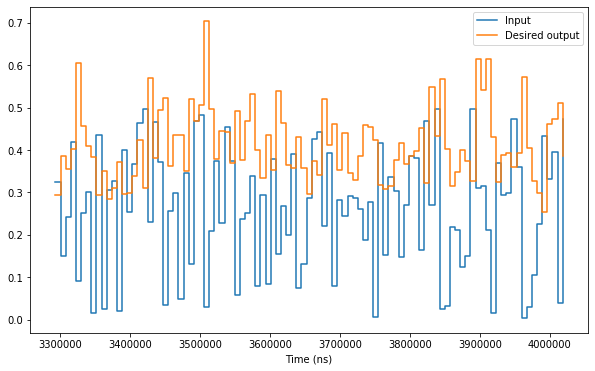

In [31]:
plt.figure(figsize=(10,6))
plt.plot(time_u[-100:],u[-100:],drawstyle='steps-post',label="Input")
plt.plot(time_y[-100:],y[-100:],drawstyle='steps-post',label="Desired output")
plt.xlabel("Time (ns)")
plt.legend(loc="best")
plt.show()

### Aspect of the output

In [32]:
S = net.gen_signal(u)
time_S = net.get_time_list_S(S)

Use bias
0
100
200
300
400
500


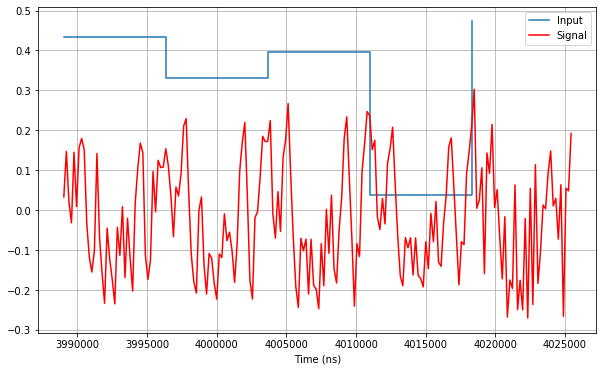

In [34]:
plt.figure(figsize=(10,6))
L = 5
plt.grid(True)
plt.plot(time_u[-L:],u[-L:],drawstyle='steps-post',label="Input")
#plt.plot(time_S[-L*net.Nvirt:],J.flatten()[-L*net.Nvirt:],drawstyle='steps-post',label="Transformed input")
plt.plot(time_S[-L*net.Nvirt:],S[:,:-1].flatten()[-L*net.Nvirt:],'r-',label="Signal")
plt.legend(loc="best")
plt.xlabel("Time (ns)")
#plt.ylim(-0.6,0.6)
plt.show()

In [111]:
T_theta_list = np.logspace(-3,2,15)
amplitude = []
Ntrain = 200
(u,y) = NARMA10(Ntrain)
N_mean = 10
L = 20
for T_t in T_theta_list:
    print(T_t)
    amp_mean = 0
    for i in range(N_mean):
        net = Single_Node_Reservoir_NARMA10(40,T_t,1,0.)
        S = net.gen_signal_fast(u)
        #M = max(S.flatten()[-L*net.Nvirt:])
        #m = min(S.flatten()[-L*net.Nvirt:])
        #amp_mean += M-m
        amp_mean += np.std(S.flatten())
    amplitude.append(amp_mean/N_mean)

0.001
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
0.0022758459260747888
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
0.005179474679231213
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
0.011787686347935873
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
0.02682695795279726
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
20

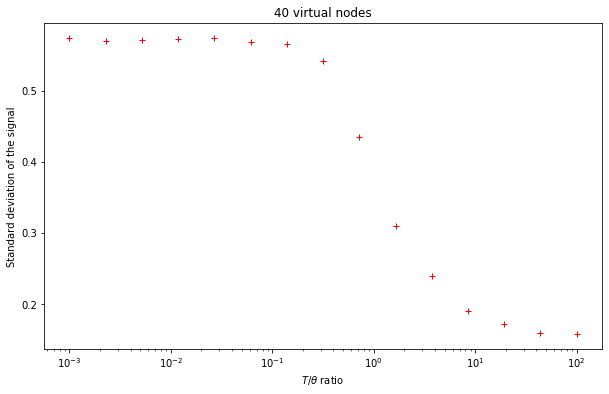

In [112]:
plt.figure(figsize=(10,6))
plt.plot(T_theta_list,amplitude,'r+')
plt.xscale("log")
plt.xlabel(r'$T/\theta$'+" ratio")
plt.ylabel("Standard deviation of the signal")
plt.title("40 virtual nodes")
plt.show()

### Training and fine-tuning

In [9]:
Ntrain = 5000
Nvalid = 5000

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)

net = Single_Node_Reservoir_NARMA10(400,5,1e-3,0.3)
S = net.gen_signal_fast(u)
S_valid = net.gen_signal_fast(u_valid)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


In [10]:
net.train(S,y,S_valid,y_valid)

alpha = 0.0 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.466
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.466
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.466
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.466
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.466
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.448 ; NRMSE (validation) = 0.461
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.454 ; NRMSE (validation) = 0.468
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.462 ; NRMSE (validation) = 0.476
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.47 ; NRMSE (validation) = 0.484
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.476 ; NRMSE (validation) = 0.49
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.497
alpha = 4.832930238571752e-07 ; NRMSE (train) = 0.493 ; NRMSE (validation) = 0.505
alpha = 2.97635144163

In [11]:
y_pred_train = net.predict(S)
y_pred_valid = net.predict(S_valid)

In [12]:
Ntest = 2500
(u_test,y_test) = NARMA10(Ntest)
S_test = net.gen_signal_fast(u_test)
y_pred_test = net.predict(S_test)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


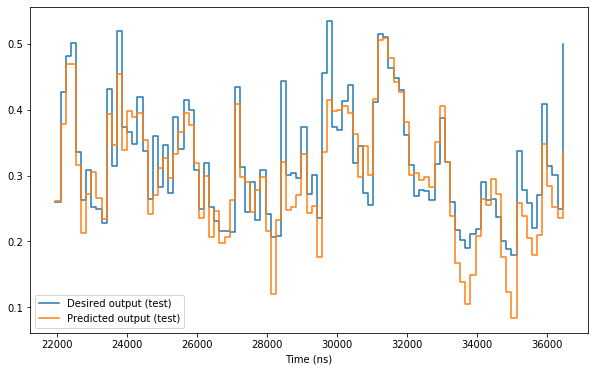

In [13]:
time_y = net.get_time_list_y(y_test)
plt.figure(figsize=(10,6))
xmin = 100
xmax = 200
plt.plot(time_y[xmin:xmax],y_test[xmin:xmax],drawstyle='steps-post',label="Desired output (test)")
plt.plot(time_y[xmin:xmax],y_pred_test[xmin:xmax],drawstyle='steps-post',label="Predicted output (test)")
plt.xlabel("Time (ns)")
plt.legend(loc="best")
plt.show()

NRMSE (train) = 0.44879064680860514


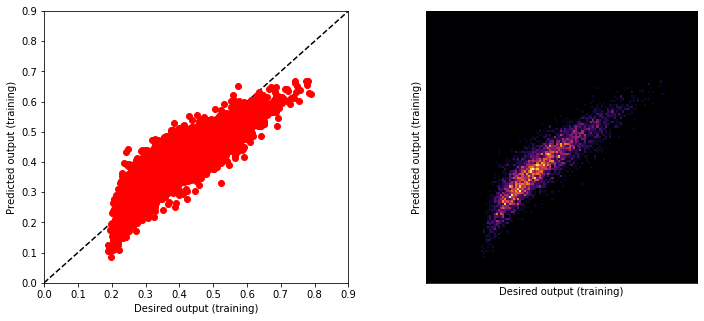

In [14]:
print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y,y_pred_train,'ro')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntrain))
H, xedges, yedges  = np.histogram2d(y,y_pred_train,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (validation) = 0.46195675475970716


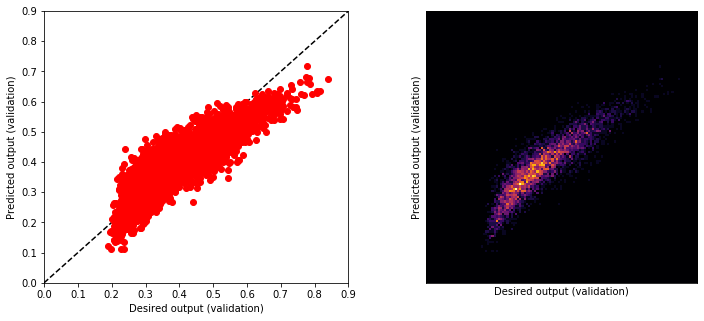

In [15]:
print("NRMSE (validation) = "+str(NRMSE_list(y_valid,y_pred_valid)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_valid,y_pred_valid,'ro')
plt.xlabel("Desired output (validation)")
plt.ylabel("Predicted output (validation)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Nvalid))
H, xedges, yedges  = np.histogram2d(y_valid,y_pred_valid,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (validation)")
plt.ylabel("Predicted output (validation)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (test) = 0.44197352712067367


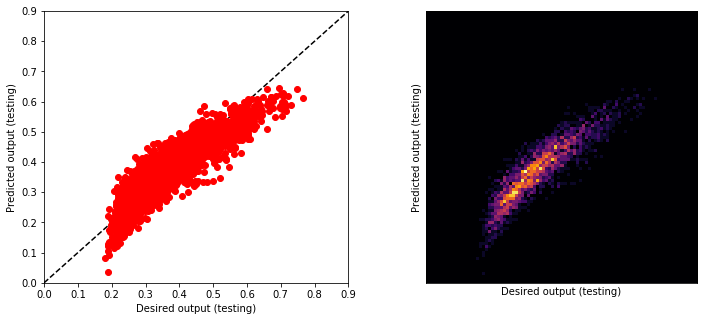

In [16]:
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_test,y_pred_test,'ro')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntest))
H, xedges, yedges  = np.histogram2d(y_test,y_pred_test,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

#### 1. Influence of $T/\theta$

In [25]:
T_theta_list = np.logspace(-1,1.5,8)

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 5

for T_t in T_theta_list:
    print(T_t)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,T_t,1e-2,0.25)

        S = net.gen_signal_fast(u)
        S_valid = net.gen_signal_fast(u_valid)
        S_test = net.gen_signal_fast(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)

        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
    
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.1
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.796 ; NRMSE (validation) = 0.815
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.796 ; NRMSE (validation) = 0.815
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.796 ; NRMSE (validation) = 0.815
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.796 ; NRMSE (validation) = 0.815
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.796 ; NRMSE (validation) = 0.815
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.796 ; NRMSE (validation) = 0.814
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.798 ; NRMSE (validation) = 0.815
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.802 ; NRMSE (validation) = 0.819
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.804 ; NRMSE (validation) = 0.822
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.805 ; NRMSE (validati

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.714 ; NRMSE (validation) = 0.742
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.714 ; NRMSE (validation) = 0.742
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.714 ; NRMSE (validation) = 0.742
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.714 ; NRMSE (validation) = 0.742
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.69 ; NRMSE (validation) = 0.722
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.723 ; NRMSE (validation) = 0.75
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.74 ; NRMSE (validation) = 0.766
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.744 ; NRMSE (validation) = 0.77
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.752 ; NRMSE (validation) = 0.774
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.768 ; NRMSE (validation) = 0.785
alpha =

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.528 ; NRMSE (validation) = 0.608
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.528 ; NRMSE (validation) = 0.608
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.528 ; NRMSE (validation) = 0.608
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.527 ; NRMSE (validation) = 0.607
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.524 ; NRMSE (validation) = 0.594
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.532 ; NRMSE (validation) = 0.589
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.544 ; NRMSE (validation) = 0.592
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.554 ; NRMSE (validation) = 0.598
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.56 ; NRMSE (validation) = 0.598
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.566 ; NRMSE (validation) = 0.594
alph

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.439 ; NRMSE (validation) = 0.516
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.439 ; NRMSE (validation) = 0.516
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.439 ; NRMSE (validation) = 0.516
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.439 ; NRMSE (validation) = 0.516
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.435 ; NRMSE (validation) = 0.509
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.444 ; NRMSE (validation) = 0.514
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.455 ; NRMSE (validation) = 0.519
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.465 ; NRMSE (validation) = 0.524
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.473 ; NRMSE (validation) = 0.527
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.485 ; NRMSE (validation) = 0.531
alp

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.415 ; NRMSE (validation) = 0.465
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.414 ; NRMSE (validation) = 0.465
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.414 ; NRMSE (validation) = 0.465
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.413 ; NRMSE (validation) = 0.462
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.413 ; NRMSE (validation) = 0.459
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.426 ; NRMSE (validation) = 0.469
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.445 ; NRMSE (validation) = 0.488
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.459 ; NRMSE (validation) = 0.504
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.467 ; NRMSE (validation) = 0.512
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.476 ; NRMSE (validation) = 0.519
alp

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.45 ; NRMSE (validation) = 0.488
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.45 ; NRMSE (validation) = 0.489
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.45 ; NRMSE (validation) = 0.489
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.45 ; NRMSE (validation) = 0.488
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.44 ; NRMSE (validation) = 0.478
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.451 ; NRMSE (validation) = 0.488
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.457 ; NRMSE (validation) = 0.493
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.461 ; NRMSE (validation) = 0.497
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.467 ; NRMSE (validation) = 0.504
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.472 ; NRMSE (validation) = 0.511
alpha = 

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.468 ; NRMSE (validation) = 0.508
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.468 ; NRMSE (validation) = 0.508
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.468 ; NRMSE (validation) = 0.508
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.468 ; NRMSE (validation) = 0.508
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.46 ; NRMSE (validation) = 0.499
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.466 ; NRMSE (validation) = 0.505
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.469 ; NRMSE (validation) = 0.507
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.472 ; NRMSE (validation) = 0.509
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.488 ; NRMSE (validation) = 0.524
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.517 ; NRMSE (validation) = 0.551
alph

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.713 ; NRMSE (validation) = 0.729
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.712 ; NRMSE (validation) = 0.728
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.713 ; NRMSE (validation) = 0.728
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.713 ; NRMSE (validation) = 0.728
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.711 ; NRMSE (validation) = 0.726
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.717 ; NRMSE (validation) = 0.729
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.727 ; NRMSE (validation) = 0.737
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.731 ; NRMSE (validation) = 0.742
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.734 ; NRMSE (validation) = 0.747
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.736 ; NRMSE (validation) = 0.751
alp

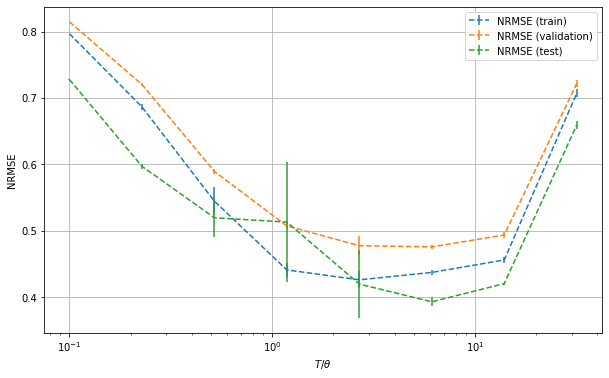

In [26]:
plt.figure(figsize=(10,6))
plt.errorbar(T_theta_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(T_theta_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(T_theta_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$T/\theta$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

#### 2. Is the superparmagnetic network important?

In [72]:
Ntrain = 1500
Nvalid = 600
Ntest = 600

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

net = Single_Node_Reservoir_NARMA10(100,1e-1,3*8e-2,0.26,bias=False)

J = net.gen_signal_without_SPN(u)
J_valid = net.gen_signal_without_SPN(u_valid)
J_test = net.gen_signal_without_SPN(u_test)

net.train_without_SPN(J,y,J_valid,y_valid)

y_pred_train = net.predict(J)
y_pred_valid = net.predict(J_valid)
y_pred_test = net.predict(J_test)

print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
print("NRMSE (validation) = "+str(NRMSE_list(y_valid,y_pred_valid)))
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))

0
100
200
300
400
500
0
100
200
0
100
200
0.0 1.375440821738229
1e-09 1.3753755001269876
1e-08 1.3753754189951442
1e-07 1.3753754085718501
1e-06 1.3753754073641224
1e-05 1.3753754083052014
0.0001 1.3753754187395182
0.001 1.375375522994481
0.01 1.3753765728417335
0.1 1.3753878015817607
Optimal alpha = 1e-06 with NRMSE = 1.3753754073641224
NRMSE (train) = 1.6193194568747356
NRMSE (validation) = 1.3753754073641224
NRMSE (test) = 1.9672729582748827


$T/\theta$ must be very low! Which means that the "memory" is useless when there is a feedback... The network doesn't work when we use J instead of S (without SPN) which tends to show that the crucial aspect of the SPN in nonlinearity (but not memory).

#### 3. Influence of $m_0$

In [27]:
m0_list = np.logspace(-2,0,8)

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 5

for m0 in m0_list:
    print(m0)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,3,m0,0.26)

        S = net.gen_signal_fast(u)
        S_valid = net.gen_signal_fast(u_valid)
        S_test = net.gen_signal_fast(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.01
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.405 ; NRMSE (validation) = 0.588
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.405 ; NRMSE (validation) = 0.588
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.405 ; NRMSE (validation) = 0.584
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.405 ; NRMSE (validation) = 0.563
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.405 ; NRMSE (validation) = 0.453
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.422 ; NRMSE (validation) = 0.467
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.439 ; NRMSE (validation) = 0.482
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.494
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.458 ; NRMSE (validation) = 0.499
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.463 ; NRMSE (validat

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.424 ; NRMSE (validation) = 0.489
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.424 ; NRMSE (validation) = 0.489
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.424 ; NRMSE (validation) = 0.489
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.424 ; NRMSE (validation) = 0.489
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.424 ; NRMSE (validation) = 0.489
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.425 ; NRMSE (validation) = 0.489
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.427 ; NRMSE (validation) = 0.491
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.429 ; NRMSE (validation) = 0.49
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.433 ; NRMSE (validation) = 0.488
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.44 ; NRMSE (validation) = 0.489
alpha

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.425 ; NRMSE (validation) = 0.482
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.425 ; NRMSE (validation) = 0.482
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.425 ; NRMSE (validation) = 0.482
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.425 ; NRMSE (validation) = 0.482
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.425 ; NRMSE (validation) = 0.482
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.425 ; NRMSE (validation) = 0.482
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.425 ; NRMSE (validation) = 0.481
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.426 ; NRMSE (validation) = 0.481
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.429 ; NRMSE (validation) = 0.483
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.434 ; NRMSE (validation) = 0.484
alp

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.518
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.518
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.518
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.518
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.518
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.518
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.518
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.518
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.518
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.444 ; NRMSE (validation) = 0.517
alp

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.564
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.564
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.564
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.564
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.564
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.564
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.564
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.564
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.484 ; NRMSE (validation) = 0.564
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.485 ; NRMSE (validation) = 0.564
alp

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.67
alpha = 7.847

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.774 ; NRMSE (validation) = 0.856
alp

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.832 ; NRMSE (validation) = 0.934
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.832 ; NRMSE (validation) = 0.934
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.832 ; NRMSE (validation) = 0.934
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.832 ; NRMSE (validation) = 0.934
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.832 ; NRMSE (validation) = 0.934
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.832 ; NRMSE (validation) = 0.934
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.832 ; NRMSE (validation) = 0.934
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.832 ; NRMSE (validation) = 0.934
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.832 ; NRMSE (validation) = 0.934
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.832 ; NRMSE (validation) 

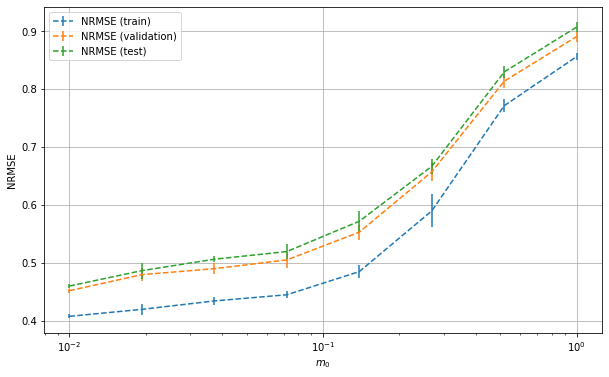

In [28]:
plt.figure(figsize=(10,6))
plt.errorbar(m0_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(m0_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(m0_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$m_0$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

#### 4. Influence of $\gamma$

In [29]:
gamma_list = np.arange(0.1,0.5,0.05)

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 5

for gamma in gamma_list:
    print(gamma)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,3,1e-2,gamma)

        S = net.gen_signal_fast(u)
        S_valid = net.gen_signal_fast(u_valid)
        S_test = net.gen_signal_fast(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.1
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.733 ; NRMSE (validation) = 0.764
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.733 ; NRMSE (validation) = 0.764
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.733 ; NRMSE (validation) = 0.764
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.734 ; NRMSE (validation) = 0.764
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.733 ; NRMSE (validation) = 0.763
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.757 ; NRMSE (validation) = 0.788
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.775 ; NRMSE (validation) = 0.807
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.782 ; NRMSE (validation) = 0.815
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.787 ; NRMSE (validation) = 0.819
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.791 ; NRMSE (validati

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.518 ; NRMSE (validation) = 0.538
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.518 ; NRMSE (validation) = 0.538
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.518 ; NRMSE (validation) = 0.538
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.515 ; NRMSE (validation) = 0.536
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.516 ; NRMSE (validation) = 0.535
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.521 ; NRMSE (validation) = 0.54
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.532 ; NRMSE (validation) = 0.55
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.565 ; NRMSE (validation) = 0.581
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.638 ; NRMSE (validation) = 0.656
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.705 ; NRMSE (validation) = 0.727
alpha

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.471 ; NRMSE (validation) = 0.497
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.471 ; NRMSE (validation) = 0.497
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.471 ; NRMSE (validation) = 0.497
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.47 ; NRMSE (validation) = 0.495
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.467 ; NRMSE (validation) = 0.49
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.475 ; NRMSE (validation) = 0.494
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.495 ; NRMSE (validation) = 0.513
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.517 ; NRMSE (validation) = 0.534
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.529 ; NRMSE (validation) = 0.544
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.54 ; NRMSE (validation) = 0.55
alpha =

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.446 ; NRMSE (validation) = 0.465
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.446 ; NRMSE (validation) = 0.465
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.446 ; NRMSE (validation) = 0.465
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.446 ; NRMSE (validation) = 0.464
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.445 ; NRMSE (validation) = 0.462
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.45 ; NRMSE (validation) = 0.468
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.461 ; NRMSE (validation) = 0.48
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.475 ; NRMSE (validation) = 0.494
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.487 ; NRMSE (validation) = 0.504
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.496 ; NRMSE (validation) = 0.51
alpha 

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.48
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.48
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.48
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.441 ; NRMSE (validation) = 0.482
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.44 ; NRMSE (validation) = 0.478
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.444 ; NRMSE (validation) = 0.48
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.451 ; NRMSE (validation) = 0.484
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.462 ; NRMSE (validation) = 0.49
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.474 ; NRMSE (validation) = 0.498
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.482 ; NRMSE (validation) = 0.501
alpha = 7

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.48 ; NRMSE (validation) = 0.82
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.48 ; NRMSE (validation) = 0.82
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.48 ; NRMSE (validation) = 0.836
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.48 ; NRMSE (validation) = 0.824
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.48 ; NRMSE (validation) = 0.835
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.48 ; NRMSE (validation) = 0.777
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.496 ; NRMSE (validation) = 1.23
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.485 ; NRMSE (validation) = 1.447
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.491 ; NRMSE (validation) = 1.449
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.507 ; NRMSE (validation) = 1.086
a

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.839 ; NRMSE (validation) = 1.202
alp

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.748 ; NRMSE (validation) = 0.787
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.748 ; NRMSE (validation) = 0.787
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.748 ; NRMSE (validation) = 0.787
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.747 ; NRMSE (validation) = 0.785
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.746 ; NRMSE (validation) = 0.786
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.744 ; NRMSE (validation) = 0.785
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.734 ; NRMSE (validation) = 0.769
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.747 ; NRMSE (validation) = 0.777
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.762 ; NRMSE (validation) = 0.793
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.775 ; NRMSE (validation) = 0.806
alp

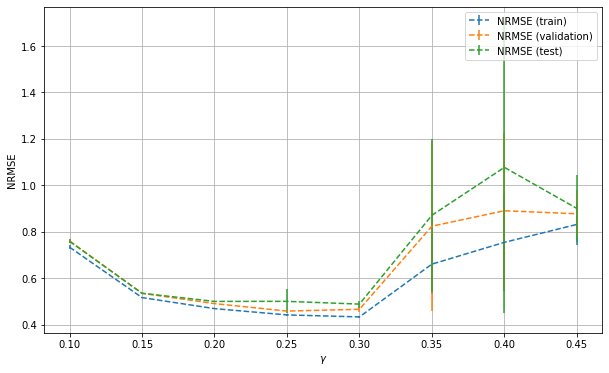

In [30]:
plt.figure(figsize=(10,6))
plt.errorbar(gamma_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(gamma_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(gamma_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$\gamma$')
plt.ylabel("NRMSE")
#plt.xscale("log")
plt.show()

#### 4. Importance of the bias

In [129]:
bias_list = [True,False]

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 3

for use_bias in bias_list:
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,3,1e-2,0.25,bias=use_bias)

        S = net.gen_signal_fast(u)
        S_valid = net.gen_signal_fast(u_valid)
        S_test = net.gen_signal_fast(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))
    
print(NRMSE_train_mean)
print(NRMSE_valid_mean)
print(NRMSE_test_mean)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.418 ; NRMSE (validation) = 0.756
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.418 ; NRMSE (validation) = 0.752
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.418 ; NRMSE (validation) = 0.757
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.417 ; NRMSE (validation) = 0.737
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.413 ; NRMSE (validation) = 0.618
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.428 ; NRMSE (validation) = 0.616
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.442 ; NRMSE (validation) = 0.611
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.602
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.462 ; NRMSE (validation) = 0.605
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.471 ; NRMSE (validation) 

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.39 ; NRMSE (validation) = 0.636
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.389 ; NRMSE (validation) = 0.79
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.391 ; NRMSE (validation) = 0.601
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.402 ; NRMSE (validation) = 0.579
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.416 ; NRMSE (validation) = 0.582
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.429 ; NRMSE (validation) = 0.585
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.442 ; NRMSE (validation) = 0.591
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.597
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.459 ; NRMSE (validation) = 0.602
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.465 ; NRMSE (validation) = 0.606
alpha = 7.8475997035146

#### Influence of $\beta'$

In [478]:
beta_prime_list = np.logspace(1,2,5)

Ntrain = 500
Nvalid = 200
Ntest = 200

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_list = []
NRMSE_valid_list = []
NRMSE_test_list = []

N = 10

for bp in beta_prime_list:
    print(bp)
    NRMSE_train = 0
    NRMSE_valid = 0
    NRMSE_test = 0
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,1e-3,1e-1,0.25,beta_prime=bp)

        (J,S) = net.gen_signal(u)
        (J_valid,S_valid) = net.gen_signal(u_valid)
        (J_test,S_test) = net.gen_signal(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train += NRMSE_list(y,y_pred_train)
        NRMSE_valid += NRMSE_list(y_valid,y_pred_valid)
        NRMSE_test += NRMSE_list(y_test,y_pred_test)
        
    NRMSE_train_list.append(NRMSE_train/N)
    NRMSE_valid_list.append(NRMSE_valid/N)
    NRMSE_test_list.append(NRMSE_test/N)

10.0
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.617920633604217
2.782559402207126e-05 0.4502103965623859
7.742636826811278e-05 0.40538632833481064
0.00021544346900318823 0.3799783095439174
0.0005994842503189409 0.386419281673574
0.0016681005372000592 0.41756382214611526
0.004641588833612777 0.44855970265240797
0.012915496650148827 0.46537891073905313
0.03593813663804626 0.47206237088590547
0.1 0.4747336254771883
Optimal alpha = 0.00021544346900318823 with NRMSE = 0.3799783095439174
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.8224362487688699
2.782559402207126e-05 0.5872718352172335
7.742636826811278e-05 0.5199212962262378
0.00021544346900318823 0.47391181278095074
0.0005994842503189409 0.45423619375319957
0.0016681005372000592 0.4569256676137079
0.004641588833612777 0.4664457703191897
0.012915496650148827 0.47157170474139204
0.03593813663804626 0.47240397696254166
0.1 0.4712418162191065
Optimal alpha = 0.0005994842503189409

0.0016681005372000592 2.3252107021779786
0.004641588833612777 2.1839376221897355
0.012915496650148827 1.9568245497653347
0.03593813663804626 1.8009968728485584
0.1 1.8418694032811418
Optimal alpha = 0.03593813663804626 with NRMSE = 1.8009968728485584
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 6.236425554281578
2.782559402207126e-05 6.225871614137241
7.742636826811278e-05 6.207218137920638
0.00021544346900318823 6.156364862018585
0.0005994842503189409 6.022525492320885
0.0016681005372000592 5.700734059865337
0.004641588833612777 5.071441988923419
0.012915496650148827 4.226617415146208
0.03593813663804626 3.5296743321077724
0.1 3.147440436355809
Optimal alpha = 0.1 with NRMSE = 3.147440436355809
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 4.413856820023065
2.782559402207126e-05 4.411956238922648
7.742636826811278e-05 4.408576079953638
0.00021544346900318823 4.399222449983043
0.0005994842503189409 4.373590455790924
0.0016681005372

200
Use bias
0
100
200
0.0 2.3887980737343537
2.782559402207126e-05 2.3824724362561738
7.742636826811278e-05 2.3713021490071027
0.00021544346900318823 2.340921640927836
0.0005994842503189409 2.261617068430832
0.0016681005372000592 2.0775241073071578
0.004641588833612777 1.7807162385158875
0.012915496650148827 1.7258541667246134
0.03593813663804626 2.197560256852773
0.1 2.6637728104348146
Optimal alpha = 0.012915496650148827 with NRMSE = 1.7258541667246134
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 2.5302531524413587
2.782559402207126e-05 2.530137022143306
7.742636826811278e-05 2.529930668837126
0.00021544346900318823 2.529360860961093
0.0005994842503189409 2.527808476932984
0.0016681005372000592 2.523729502686881
0.004641588833612777 2.513953599884827
0.012915496650148827 2.494860516547388
0.03593813663804626 2.4685504239803877
0.1 2.443229980574522
Optimal alpha = 0.1 with NRMSE = 2.443229980574522
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bia

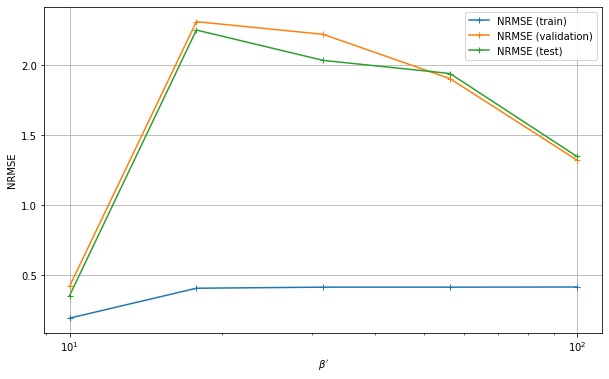

In [479]:
plt.figure(figsize=(10,6))
plt.plot(beta_prime_list,NRMSE_train_list,marker='+',linestyle = '-',label="NRMSE (train)")
plt.plot(beta_prime_list,NRMSE_valid_list,marker='+',linestyle = '-',label="NRMSE (validation)")
plt.plot(beta_prime_list,NRMSE_test_list,marker='+',linestyle = '-',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$\beta^\prime$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

### With 2 inputs (at $k$ and $k-1$)

In [36]:
Ntrain = 5000
Nvalid = 5000

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)

net = Single_Node_Reservoir_NARMA10(400,3,1e-2,0.25)
S = net.gen_signal_fast_2_inputs(u, 0.4)
S_valid = net.gen_signal_fast_2_inputs(u_valid, 0.4)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


In [37]:
net.train(S,y,S_valid,y_valid)

alpha = 0.0 ; NRMSE (train) = 0.38 ; NRMSE (validation) = 0.405
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.38 ; NRMSE (validation) = 0.405
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.38 ; NRMSE (validation) = 0.405
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.379 ; NRMSE (validation) = 0.403
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.377 ; NRMSE (validation) = 0.401
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.379 ; NRMSE (validation) = 0.401
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.399 ; NRMSE (validation) = 0.42
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.415 ; NRMSE (validation) = 0.436
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.429 ; NRMSE (validation) = 0.449
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.445 ; NRMSE (validation) = 0.465
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.459 ; NRMSE (validation) = 0.481
alpha = 4.832930238571752e-07 ; NRMSE (train) = 0.469 ; NRMSE (validation) = 0.492
alpha = 2.9763514416313

In [38]:
y_pred_train = net.predict(S)
y_pred_valid = net.predict(S_valid)

In [44]:
Ntest = 2500
(u_test,y_test) = NARMA10(Ntest)
S_test = net.gen_signal_fast_2_inputs(u_test,0.4)
y_pred_test = net.predict(S_test)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


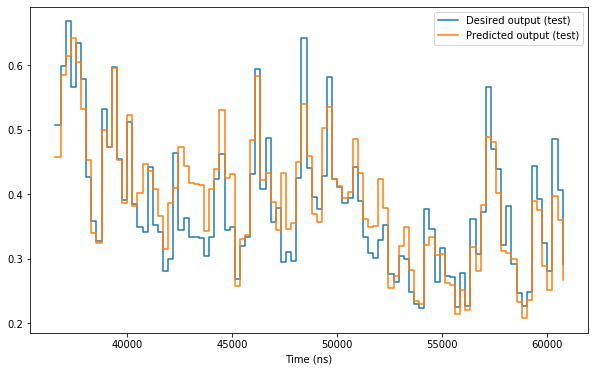

In [45]:
time_y = net.get_time_list_y(y_test)
plt.figure(figsize=(10,6))
xmin = 100
xmax = 200
plt.plot(time_y[xmin:xmax],y_test[xmin:xmax],drawstyle='steps-post',label="Desired output (test)")
plt.plot(time_y[xmin:xmax],y_pred_test[xmin:xmax],drawstyle='steps-post',label="Predicted output (test)")
plt.xlabel("Time (ns)")
plt.legend(loc="best")
plt.show()

NRMSE (train) = 0.37996827576679365


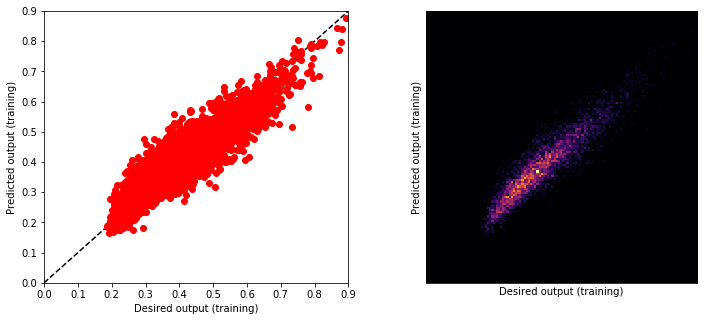

In [46]:
print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y,y_pred_train,'ro')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntrain))
H, xedges, yedges  = np.histogram2d(y,y_pred_train,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (validation) = 0.40103329665250154


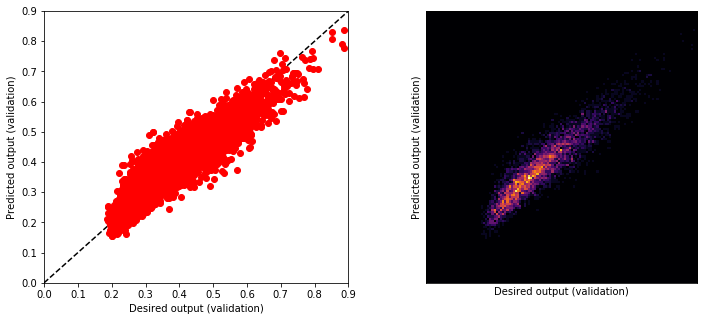

In [47]:
print("NRMSE (validation) = "+str(NRMSE_list(y_valid,y_pred_valid)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_valid,y_pred_valid,'ro')
plt.xlabel("Desired output (validation)")
plt.ylabel("Predicted output (validation)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Nvalid))
H, xedges, yedges  = np.histogram2d(y_valid,y_pred_valid,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (validation)")
plt.ylabel("Predicted output (validation)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (test) = 0.42443255906992505


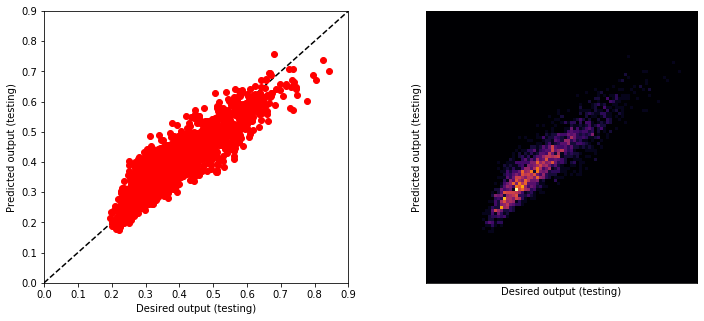

In [48]:
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_test,y_pred_test,'ro')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntest))
H, xedges, yedges  = np.histogram2d(y_test,y_pred_test,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

In [26]:
T_theta_list = np.logspace(0,1,5)

Ntrain = 500
Nvalid = 500
Ntest = 250

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for T_t in T_theta_list:
    print(T_t)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,T_t,1e-2,0.25)

        S = net.gen_signal_fast_2_inputs(u,0.5)
        S_valid = net.gen_signal_fast_2_inputs(u_valid,0.5)
        S_test = net.gen_signal_fast_2_inputs(u_test,0.5)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)

        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
    
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

1.0
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.412 ; NRMSE (validation) = 0.715
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.412 ; NRMSE (validation) = 0.71
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.412 ; NRMSE (validation) = 0.71
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.411 ; NRMSE (validation) = 0.69
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.418 ; NRMSE (validation) = 0.618
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.436 ; NRMSE (validation) = 0.569
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.461 ; NRMSE (validation) = 0.54
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.483 ; NRMSE (validation) = 0.515
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.502 ; NRMSE (validation) = 0.501
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.517 ; NRMSE (validation) = 0.501
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.536 ; NRMSE (validation) = 0.518
alpha = 4.83293023857

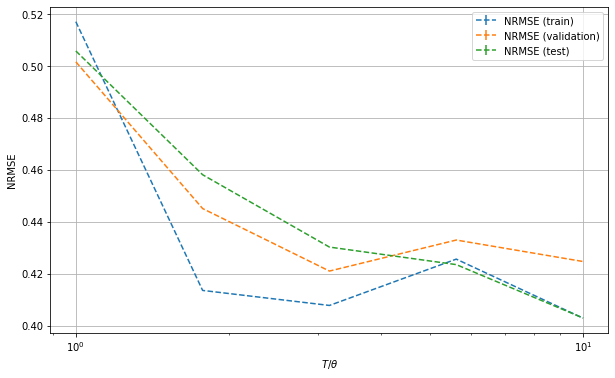

In [27]:
plt.figure(figsize=(10,6))
plt.errorbar(T_theta_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(T_theta_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(T_theta_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$T/\theta$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

In [30]:
m0_list = np.logspace(-4,-2,5)

Ntrain = 500
Nvalid = 500
Ntest = 250

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for m0 in m0_list:
    print(m0)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,3,m0,0.25)

        S = net.gen_signal_fast_2_inputs(u,0.5)
        S_valid = net.gen_signal_fast_2_inputs(u_valid,0.5)
        S_test = net.gen_signal_fast_2_inputs(u_test,0.5)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.0001
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.503 ; NRMSE (validation) = 0.546
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.503 ; NRMSE (validation) = 0.546
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.503 ; NRMSE (validation) = 0.546
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.503 ; NRMSE (validation) = 0.547
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.499 ; NRMSE (validation) = 0.542
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.507 ; NRMSE (validation) = 0.55
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.527 ; NRMSE (validation) = 0.565
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.554 ; NRMSE (validation) = 0.582
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.578 ; NRMSE (validation) = 0.59
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.634 ; NRMSE (validation) = 0.639
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.728 ; NRMSE (validation) = 0.75
alpha = 4.8329302

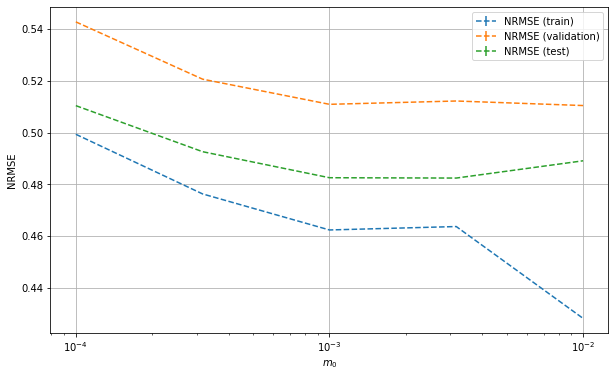

In [31]:
plt.figure(figsize=(10,6))
plt.errorbar(m0_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(m0_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(m0_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$m_0$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

In [32]:
input_ratio_list = np.linspace(0,0.5,6)

Ntrain = 500
Nvalid = 500
Ntest = 250

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for input_ratio in input_ratio_list:
    print(input_ratio)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,3,1e-2,0.25)

        S = net.gen_signal_fast_2_inputs(u,input_ratio)
        S_valid = net.gen_signal_fast_2_inputs(u_valid,input_ratio)
        S_test = net.gen_signal_fast_2_inputs(u_test,input_ratio)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.0
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.416 ; NRMSE (validation) = 0.449
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.419 ; NRMSE (validation) = 0.454
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.415 ; NRMSE (validation) = 0.447
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.415 ; NRMSE (validation) = 0.444
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.422 ; NRMSE (validation) = 0.441
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.442 ; NRMSE (validation) = 0.451
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.461 ; NRMSE (validation) = 0.463
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.475 ; NRMSE (validation) = 0.472
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.483 ; NRMSE (validation) = 0.478
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.493 ; NRMSE (validation) = 0.486
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.509 ; NRMSE (validation) = 0.498
alpha = 4.8329302

100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.415 ; NRMSE (validation) = 0.434
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.41 ; NRMSE (validation) = 0.429
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.41 ; NRMSE (validation) = 0.429
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.409 ; NRMSE (validation) = 0.439
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.412 ; NRMSE (validation) = 0.44
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.434 ; NRMSE (validation) = 0.454
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.45 ; NRMSE (validation) = 0.464
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.463 ; NRMSE (validation) = 0.469
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.478 ; NRMSE (validation) = 0.476
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.49 ; NRMSE (validation) = 0.484
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.499 ; NRMSE (validation) = 0.491
alpha = 4.832930238571752e-07 ; NRMSE

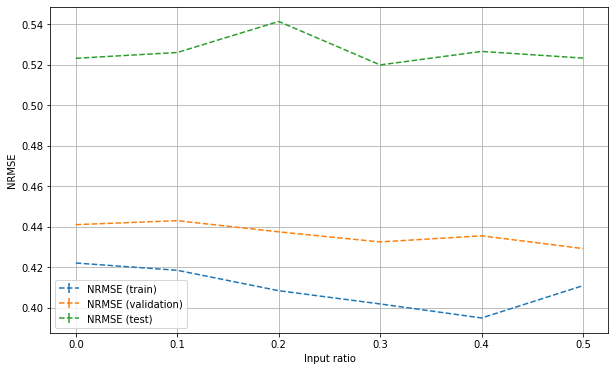

In [33]:
plt.figure(figsize=(10,6))
plt.errorbar(input_ratio_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(input_ratio_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(input_ratio_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel("Input ratio")
plt.ylabel("NRMSE")
#plt.xscale("log")
plt.show()

In [34]:
gamma_list = np.arange(0.1,0.5,0.05)

Ntrain = 500
Nvalid = 500
Ntest = 250

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for gamma in gamma_list:
    print(gamma)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,3,1e-2,gamma)

        S = net.gen_signal_fast_2_inputs(u,0.4)
        S_valid = net.gen_signal_fast_2_inputs(u_valid,0.4)
        S_test = net.gen_signal_fast_2_inputs(u_test,0.4)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.1
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.749 ; NRMSE (validation) = 0.914
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.749 ; NRMSE (validation) = 0.914
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.749 ; NRMSE (validation) = 0.914
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.747 ; NRMSE (validation) = 0.912
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.74 ; NRMSE (validation) = 0.903
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.76 ; NRMSE (validation) = 0.934
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.776 ; NRMSE (validation) = 0.953
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.791 ; NRMSE (validation) = 0.954
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.807 ; NRMSE (validation) = 0.96
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.816 ; NRMSE (validation) = 0.958
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.823 ; NRMSE (validation) = 0.956
alpha = 4.8329302385

100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.505 ; NRMSE (validation) = 2.0
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.505 ; NRMSE (validation) = 2.0
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.505 ; NRMSE (validation) = 1.968
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.505 ; NRMSE (validation) = 1.942
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.498 ; NRMSE (validation) = 1.496
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.483 ; NRMSE (validation) = 2.153
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.51 ; NRMSE (validation) = 1.333
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.534 ; NRMSE (validation) = 0.811
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.547 ; NRMSE (validation) = 0.805
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.559 ; NRMSE (validation) = 0.963
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.572 ; NRMSE (validation) = 1.153
alpha = 4.832930238571752e-07 ; NRMSE

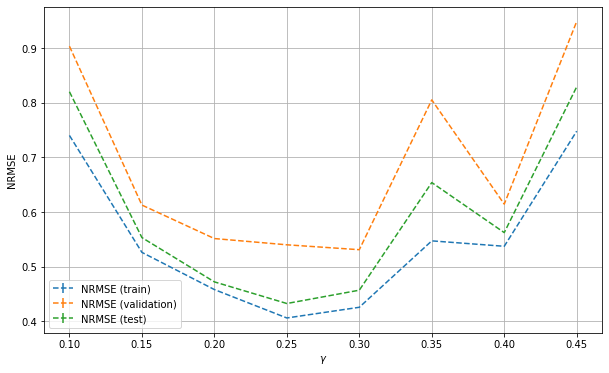

In [35]:
plt.figure(figsize=(10,6))
plt.errorbar(gamma_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(gamma_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(gamma_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$\gamma$')
plt.ylabel("NRMSE")
#plt.xscale("log")
plt.show()

### With delayed feedback

In [59]:
Ntrain = 5000
Nvalid = 5000

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)

net = Single_Node_Reservoir_NARMA10(400,1e-2,1e-2,0.25)
S = net.gen_signal_fast_delayed_feedback(u, 1)
S_valid = net.gen_signal_fast_delayed_feedback(u_valid, 1)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


In [60]:
net.train(S,y,S_valid,y_valid)

alpha = 0.0 ; NRMSE (train) = 0.142 ; NRMSE (validation) = 0.167
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.142 ; NRMSE (validation) = 0.167
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.142 ; NRMSE (validation) = 0.167
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.142 ; NRMSE (validation) = 0.167
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.142 ; NRMSE (validation) = 0.167
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.142 ; NRMSE (validation) = 0.167
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.142 ; NRMSE (validation) = 0.167
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.142 ; NRMSE (validation) = 0.167
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.146 ; NRMSE (validation) = 0.17
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.17 ; NRMSE (validation) = 0.19
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.234 ; NRMSE (validation) = 0.248
alpha = 4.832930238571752e-07 ; NRMSE (train) = 0.312 ; NRMSE (validation) = 0.324
alpha = 2.976351441631

In [61]:
y_pred_train = net.predict(S)
y_pred_valid = net.predict(S_valid)

In [62]:
Ntest = 2500
(u_test,y_test) = NARMA10(Ntest)
S_test = net.gen_signal_fast_delayed_feedback(u_test,1)
y_pred_test = net.predict(S_test)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


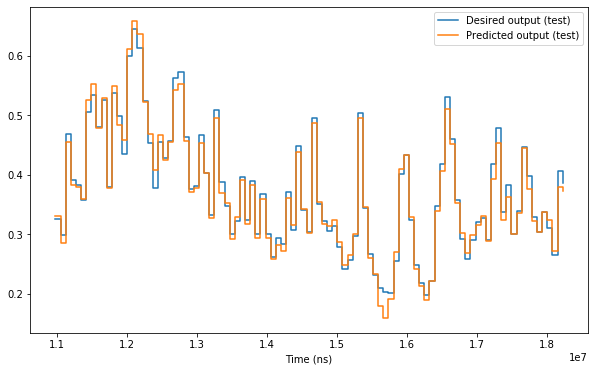

In [63]:
time_y = net.get_time_list_y(y_test)
plt.figure(figsize=(10,6))
xmin = 100
xmax = 200
plt.plot(time_y[xmin:xmax],y_test[xmin:xmax],drawstyle='steps-post',label="Desired output (test)")
plt.plot(time_y[xmin:xmax],y_pred_test[xmin:xmax],drawstyle='steps-post',label="Predicted output (test)")
plt.xlabel("Time (ns)")
plt.legend(loc="best")
plt.show()

NRMSE (train) = 0.14267822746658687


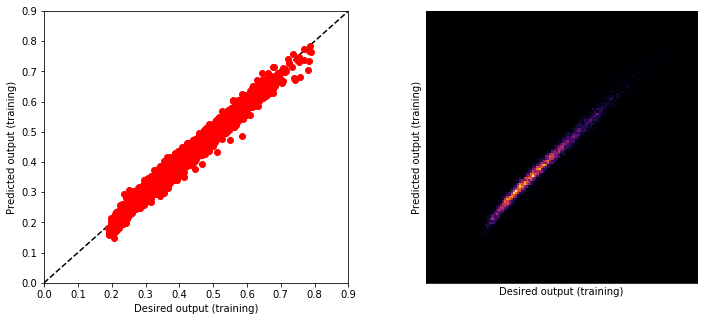

In [64]:
print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y,y_pred_train,'ro')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntrain))
H, xedges, yedges  = np.histogram2d(y,y_pred_train,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (test) = 0.18744868383123656


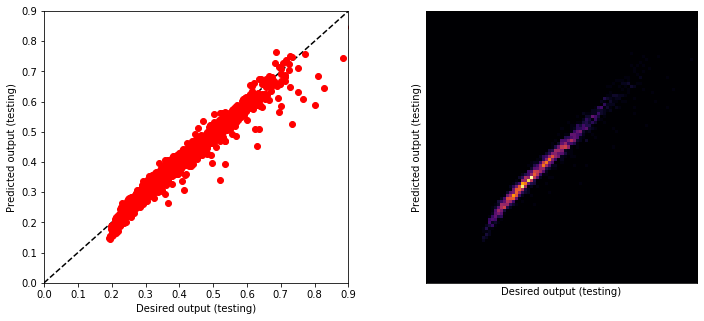

In [65]:
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_test,y_pred_test,'ro')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntest))
H, xedges, yedges  = np.histogram2d(y_test,y_pred_test,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

In [51]:
T_theta_list = np.logspace(0,1,5)

Ntrain = 500
Nvalid = 500
Ntest = 250

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for T_t in T_theta_list:
    print(T_t)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,T_t,1e-2,0.25)

        S = net.gen_signal_fast_delayed_feedback(u,1)
        S_valid = net.gen_signal_fast_delayed_feedback(u_valid,1)
        S_test = net.gen_signal_fast_delayed_feedback(u_test,1)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)

        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
    
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

1.0
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.298 ; NRMSE (validation) = 0.385
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.298 ; NRMSE (validation) = 0.385
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.298 ; NRMSE (validation) = 0.382
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.295 ; NRMSE (validation) = 0.377
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.297 ; NRMSE (validation) = 0.375
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.307 ; NRMSE (validation) = 0.38
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.318 ; NRMSE (validation) = 0.384
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.334 ; NRMSE (validation) = 0.39
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.35 ; NRMSE (validation) = 0.398
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.371 ; NRMSE (validation) = 0.41
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.4 ; NRMSE (validation) = 0.429
alpha = 4.8329302385717

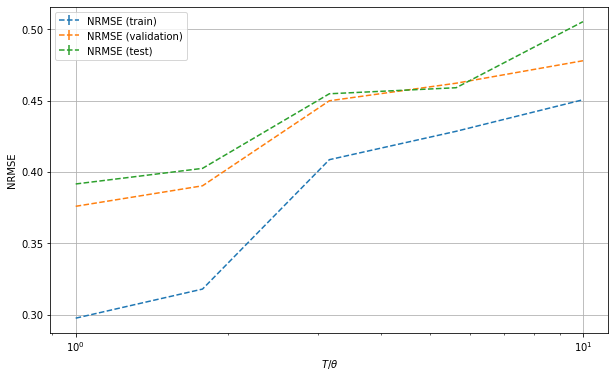

In [52]:
plt.figure(figsize=(10,6))
plt.errorbar(T_theta_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(T_theta_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(T_theta_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$T/\theta$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

In [53]:
m0_list = np.logspace(-4,0,5)

Ntrain = 500
Nvalid = 500
Ntest = 250

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for m0 in m0_list:
    print(m0)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,1e-2,m0,0.25)

        S = net.gen_signal_fast_delayed_feedback(u,1)
        S_valid = net.gen_signal_fast_delayed_feedback(u_valid,1)
        S_test = net.gen_signal_fast_delayed_feedback(u_test,1)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.0001
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.385 ; NRMSE (validation) = 0.437
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.385 ; NRMSE (validation) = 0.437
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.385 ; NRMSE (validation) = 0.437
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.384 ; NRMSE (validation) = 0.437
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.385 ; NRMSE (validation) = 0.435
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.387 ; NRMSE (validation) = 0.432
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.39 ; NRMSE (validation) = 0.431
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.391 ; NRMSE (validation) = 0.432
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.393 ; NRMSE (validation) = 0.438
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.398 ; NRMSE (validation) = 0.454
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.418 ; NRMSE (validation) = 0.49
alpha = 4.832930

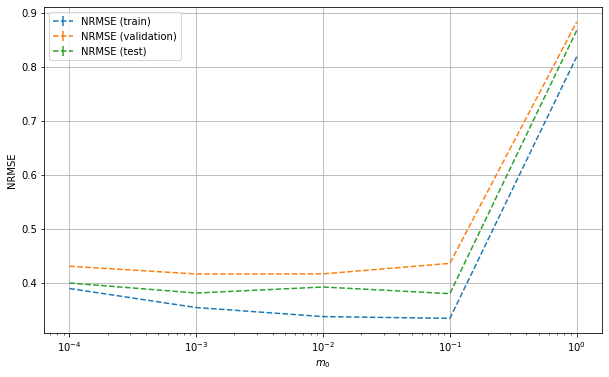

In [54]:
plt.figure(figsize=(10,6))
plt.errorbar(m0_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(m0_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(m0_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$m_0$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

In [55]:
delay_list = np.arange(1,10,2)

Ntrain = 500
Nvalid = 500
Ntest = 250

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for delay_fb in delay_list:
    print(delay_fb)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,1e-2,1e-2,0.25)

        S = net.gen_signal_fast_delayed_feedback(u,delay_fb)
        S_valid = net.gen_signal_fast_delayed_feedback(u_valid,delay_fb)
        S_test = net.gen_signal_fast_delayed_feedback(u_test,delay_fb)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

1
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.287 ; NRMSE (validation) = 0.413
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.287 ; NRMSE (validation) = 0.413
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.287 ; NRMSE (validation) = 0.413
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.287 ; NRMSE (validation) = 0.413
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.287 ; NRMSE (validation) = 0.413
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.287 ; NRMSE (validation) = 0.413
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.287 ; NRMSE (validation) = 0.412
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.288 ; NRMSE (validation) = 0.411
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.291 ; NRMSE (validation) = 0.406
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.298 ; NRMSE (validation) = 0.402
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.309 ; NRMSE (validation) = 0.402
alpha = 4.832930238

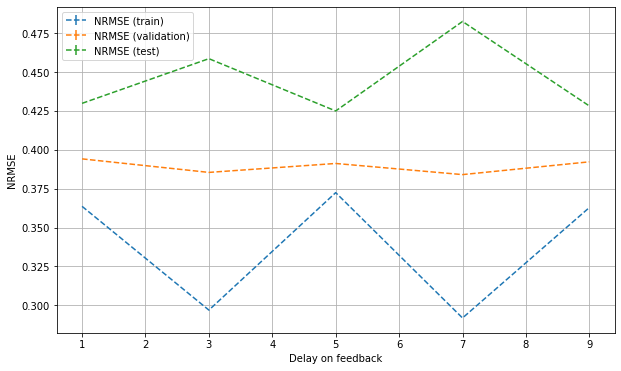

In [56]:
plt.figure(figsize=(10,6))
plt.errorbar(delay_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(delay_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(delay_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel("Delay on feedback")
plt.ylabel("NRMSE")
#plt.xscale("log")
plt.show()

In [57]:
gamma_list = np.arange(0.1,0.5,0.05)

Ntrain = 500
Nvalid = 500
Ntest = 250

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for gamma in gamma_list:
    print(gamma)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,1e-2,1e-2,gamma)

        S = net.gen_signal_fast_delayed_feedback(u,1)
        S_valid = net.gen_signal_fast_delayed_feedback(u_valid,1)
        S_test = net.gen_signal_fast_delayed_feedback(u_test,1)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.1
Use bias
0
100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.414 ; NRMSE (validation) = 0.456
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.414 ; NRMSE (validation) = 0.456
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.414 ; NRMSE (validation) = 0.456
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.415 ; NRMSE (validation) = 0.458
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.428 ; NRMSE (validation) = 0.472
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.472 ; NRMSE (validation) = 0.516
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.565 ; NRMSE (validation) = 0.61
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.707 ; NRMSE (validation) = 0.752
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.773 ; NRMSE (validation) = 0.818
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.787 ; NRMSE (validation) = 0.833
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.789 ; NRMSE (validation) = 0.836
alpha = 4.83293023

100
200
300
400
500
Use bias
0
100
200
300
400
500
Use bias
0
100
200
alpha = 0.0 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.336 ; NRMSE (validation) = 0.438
alpha = 4.832930238571752e-07 ; 

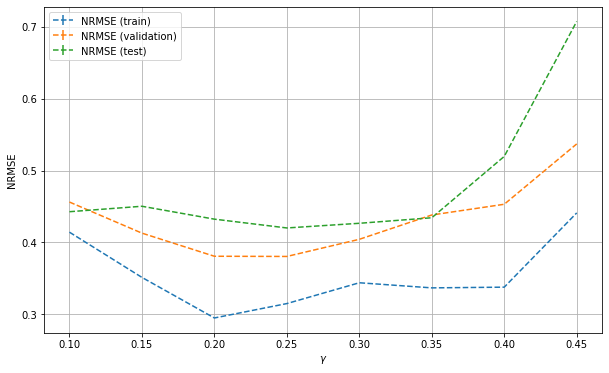

In [58]:
plt.figure(figsize=(10,6))
plt.errorbar(gamma_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(gamma_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(gamma_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$\gamma$')
plt.ylabel("NRMSE")
#plt.xscale("log")
plt.show()

#### Without the SPN?

In [18]:
Ntrain = 5000
Nvalid = 5000
Ntest = 2500

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

net = Single_Node_Reservoir_NARMA10(400,1e-2,1e-1,.8)

J = net.gen_signal_delayed_feedback_without_SPN(u,1)
J_valid = net.gen_signal_delayed_feedback_without_SPN(u_valid,1)
J_test = net.gen_signal_delayed_feedback_without_SPN(u_test,1)

net.train_without_SPN(J,y,J_valid,y_valid)

y_pred_train = net.predict(J)
y_pred_valid = net.predict(J_valid)
y_pred_test = net.predict(J_test)

print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
print("NRMSE (validation) = "+str(NRMSE_list(y_valid,y_pred_valid)))
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
0.0 0.1470148391467786
6.158482110660255e-15 0.14701480605551778
3.7926901907322537e-14 0.14701484143627866
2.335721469090121e-13 0.14701481538362246
1.438449888287666e-12 0.14701479262371697
8.858667904100833e-12 0.14701450059983437
5.4555947811685145e-11 0.1470129874028459
3.3598182862837877e-10 0.14700375126645573
2.06913808111479e-09 0.14694952466583983
1.2742749

In [81]:
gamma_list = np.arange(0.6,3,0.1)

Ntrain = 5000
Nvalid = 5000
Ntest = 2500

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for gamma in gamma_list:
    print(gamma)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,1e-2,3*1e-2,gamma)

        J = net.gen_signal_delayed_feedback_without_SPN(u,1)
        J_valid = net.gen_signal_delayed_feedback_without_SPN(u_valid,1)
        J_test = net.gen_signal_delayed_feedback_without_SPN(u_test,1)

        net.train_without_SPN(J,y,J_valid,y_valid)

        y_pred_train = net.predict(J)
        y_pred_valid = net.predict(J_valid)
        y_pred_test = net.predict(J_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.6
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
0.0 0.39733472690603544
6.158482110660255e-15 0.39733480105836533
3.7926901907322537e-14 0.39733436801698535
2.335721469090121e-13 0.39734458516174614
1.438449888287666e-12 0.3973617708807032
8.858667904100833e-12 0.3962845355434516
5.4555947811685145e-11 0.398510492701775
3.3598182862837877e-10 0.4007176833410094
2.06913808111479e-09 0.4036306924138279
1.2742749

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,6))
plt.errorbar(gamma_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(gamma_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(gamma_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$\gamma$')
plt.ylabel("NRMSE")
#plt.xscale("log")
plt.show()

NRMSE (train) = 0.1371011191370936


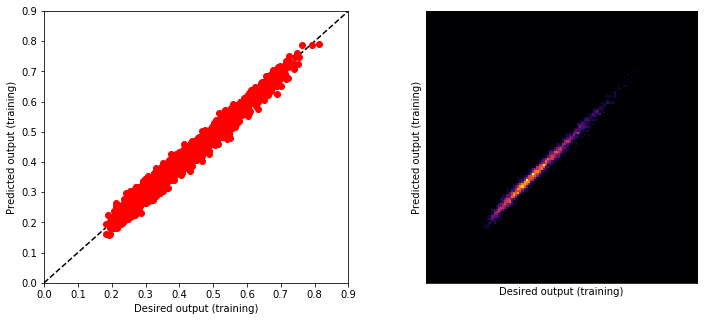

In [19]:
print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y,y_pred_train,'ro')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntrain))
H, xedges, yedges  = np.histogram2d(y,y_pred_train,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (test) = 0.14059692345081592


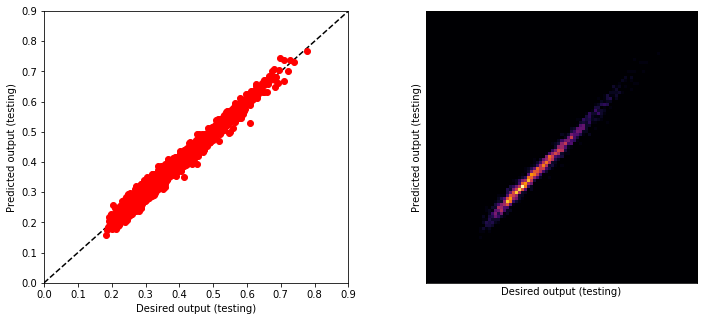

In [20]:
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_test,y_pred_test,'ro')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntest))
H, xedges, yedges  = np.histogram2d(y_test,y_pred_test,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

In [15]:
m0_list = np.logspace(-2,0,5)

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for m0 in m0_list:
    print(m0)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,1e-2,m0,0.8)

        J = net.gen_signal_delayed_feedback_without_SPN(u,1)
        J_valid = net.gen_signal_delayed_feedback_without_SPN(u_valid,1)
        J_test = net.gen_signal_delayed_feedback_without_SPN(u_test,1)

        net.train_without_SPN(J,y,J_valid,y_valid)

        y_pred_train = net.predict(J)
        y_pred_valid = net.predict(J_valid)
        y_pred_test = net.predict(J_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.01
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
0.0 0.31810530999205905
6.158482110660255e-15 0.3177655366224466
3.7926901907322537e-14 0.3137469041026963
2.335721469090121e-13 0.30611339706152507
1.438449888287666e-12 0.26819100589958916
8.858667904100833e-12 0.35104617193240334
5.4555947811685145e-11 0.3947259325589647
3.3598182862837877e-10 0.40579483414712003
2.06913808111479e-09 0.4078440304409238
1.2742749857031347e-08 0.408070264261055
7.847599703514623e-08 0.4081715250680259
4.832930238571752e-07 0.408475825146185
2.976351441631313e-06 0.40745385244799853
1.8329807108324375e-05 0.40688140634387177
0.00011288378916846884 0.4085961069761459
0.000695192796177562 0.4155118630266726
0.004281332398719396 0.4551499369214622
0.026366508987303555 0.6339572182300871
0.16237767391887242 0.7783765269822704
1.0 0.8844052589739383
Optimal alpha

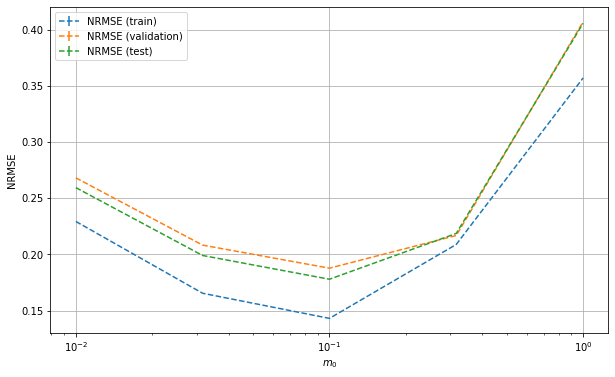

In [16]:
plt.figure(figsize=(10,6))
plt.errorbar(m0_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(m0_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(m0_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$m_0$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

In [89]:
T_theta_list = np.logspace(-4,1,5)

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for T_t in T_theta_list:
    print(T_t)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,T_t,1e-2,0.8)

        J = net.gen_signal_delayed_feedback_without_SPN(u,1)
        J_valid = net.gen_signal_delayed_feedback_without_SPN(u_valid,1)
        J_test = net.gen_signal_delayed_feedback_without_SPN(u_test,1)

        net.train_without_SPN(J,y,J_valid,y_valid)

        y_pred_train = net.predict(J)
        y_pred_valid = net.predict(J_valid)
        y_pred_test = net.predict(J_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
    
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.0001
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
0.0 0.3669624264015698
6.158482110660255e-15 0.36693917479203536
3.7926901907322537e-14 0.3670562330107092
2.335721469090121e-13 0.3666006174599616
1.438449888287666e-12 0.3669795811120481
8.858667904100833e-12 0.36583848424921356
5.4555947811685145e-11 0.3651219577137842
3.3598182862837877e-10 0.36481505323053665
2.06913808111479e-09 0.3649500337656515
1.2742749857031347e-08 0.36497292138360343
7.847599703514623e-08 0.3648903888414973
4.832930238571752e-07 0.36565290470687006
2.976351441631313e-06 0.36716006090762526
1.8329807108324375e-05 0.36866582219120536
0.00011288378916846884 0.37423854870336637
0.000695192796177562 0.39492161491999633
0.004281332398719396 0.48328497390187647
0.026366508987303555 0.6609006217019413
0.16237767391887242 0.7791607100267052
1.0 0.883898650928069
Optimal

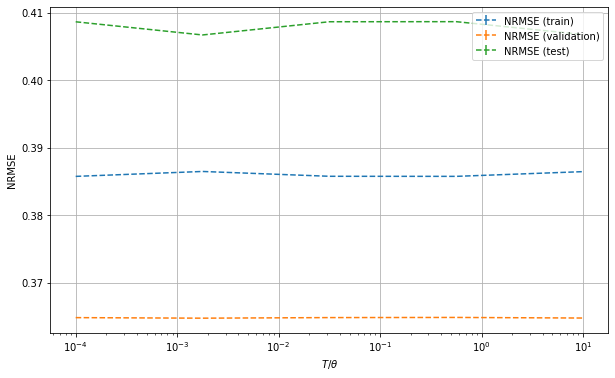

In [90]:
plt.figure(figsize=(10,6))
plt.errorbar(T_theta_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(T_theta_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(T_theta_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$T/\theta$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

In [91]:
delay_list = np.arange(1,10)

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 1

for delay_fb in delay_list:
    print(delay_fb)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,1e-2,1e-2,0.9)

        J = net.gen_signal_delayed_feedback_without_SPN(u,delay_fb)
        J_valid = net.gen_signal_delayed_feedback_without_SPN(u_valid,delay_fb)
        J_test = net.gen_signal_delayed_feedback_without_SPN(u_test,delay_fb)

        net.train_without_SPN(J,y,J_valid,y_valid)

        y_pred_train = net.predict(J)
        y_pred_valid = net.predict(J_valid)
        y_pred_test = net.predict(J_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

1
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
0.0 0.39379421588781854
6.158482110660255e-15 0.39382426257281616
3.7926901907322537e-14 0.39348781367059427
2.335721469090121e-13 0.39352886522530817
1.438449888287666e-12 0.39289614149709146
8.858667904100833e-12 0.3921509071464014
5.4555947811685145e-11 0.39143017098674876
3.3598182862837877e-10 0.39072560614523
2.06913808111479e-09 0.3901133902524153
1.2742749857031347e-08 0.3894549296212283
7.847599703514623e-08 0.38831582970501655
4.832930238571752e-07 0.3865549743961653
2.976351441631313e-06 0.3856004195039772
1.8329807108324375e-05 0.3853484964212754
0.00011288378916846884 0.38557810283231564
0.000695192796177562 0.3874521922207945
0.004281332398719396 0.39755884527167085
0.026366508987303555 0.44542182908458977
0.16237767391887242 0.6111995398596376
1.0 0.8275668306503201
Optimal alpha

0.16237767391887242 0.6198536176231333
1.0 0.8330410188123406
Optimal alpha = 1.8329807108324375e-05 with NRMSE = 0.38524255934386087
9
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
0.0 0.39403148199859733
6.158482110660255e-15 0.39399764787316127
3.7926901907322537e-14 0.3939195821085288
2.335721469090121e-13 0.3937465015037594
1.438449888287666e-12 0.39274037385525473
8.858667904100833e-12 0.3920665061907808
5.4555947811685145e-11 0.39137815148858457
3.3598182862837877e-10 0.39071189740497114
2.06913808111479e-09 0.39007170731204166
1.2742749857031347e-08 0.38936270410789275
7.847599703514623e-08 0.38808846341578757
4.832930238571752e-07 0.3863901761556395
2.976351441631313e-06 0.38557657136270596
1.8329807108324375e-05 0.385334733967319
0.00011288378916846884 0.3858768744624906
0.000695192796177562 0.3890680137573275
0.004281332398719396 

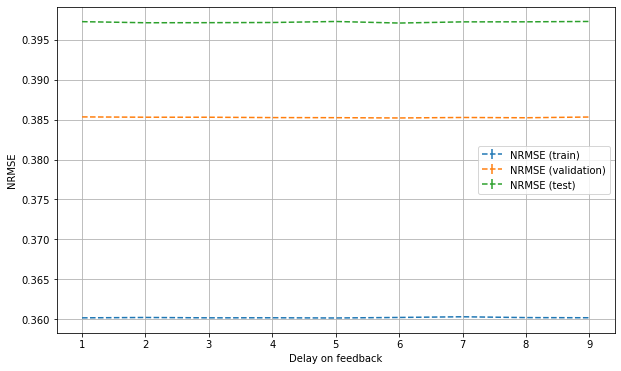

In [92]:
plt.figure(figsize=(10,6))
plt.errorbar(delay_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(delay_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(delay_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel("Delay on feedback")
plt.ylabel("NRMSE")
#plt.xscale("log")
plt.show()

### With output feedback